# Euler-Lagrange | Pendulums

[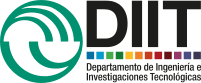](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Euler-Lagrange equation

> Referencia
> - Apunte Lanczos $\S6$

The Euler-Lagrange for a generalized coordinate $q$ is
$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{q} }
& -\frac{\partial \mathcal{L} }{\partial q}
 = 0
\end{aligned},
$$
where $\mathcal{L}$ is the system's Lagrangian.

**(Es imperativo leer la referencia para entender la deducción de esta ecuación)**

### Lagrangian
> Referencia
> - Apunte Lanczos $\S5$

The Lagrangian (or Lagrangian function) of a system is determined by the system's kinetic energy $T$ and potential energy $V$ expressed as functions of generalized coordinates and velocities, and eventually, of time.
$$
\mathcal{L} (q_i, \dot{q}_i, t)= T(q_i, \dot{q}_i, t) - V(q_i, \dot{q}_i, t).
$$

## Euler-Lagrange equation for a free particle

For a free particle that moves on $\hat{x}$, the lagrangian es the kinetic energy
$$
\mathcal{L} = T = \frac{m}{2} \dot{x}^2 \,.
$$
If we differentiate respect to velocity $\dot{x}$, we find the linear momentum
$$
p_x = \frac{\partial}{\partial \dot{x}} \mathcal{L} = \frac{\partial}{\partial \dot{x}} T = m \dot{x}\, .
$$

This applies to every generalized coordinate, thus the generalized momentums are 
$$
p_i = \frac{\partial}{\partial \dot{q_i}} \mathcal{L}\,. 
$$
We name this as `dtdp`, the part of the Euler-Lagrange equation where

$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} = \frac{\mathrm{d}}{\mathrm{d}t} p_i$$
we differentiate the generalized momentum $p_i$ with respect to time.

In a similar manner, differentiating with respect to the generalized coordinate

$$
\frac{\partial}{\partial q_i} \mathcal{L}
$$
will be called `dq`.

For this particle, the Euler-Lagrange equation is
$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }
 -\frac{\partial \mathcal{L} }{\partial x}
& = 0\\
 m \ddot{x} &= 0\,.
\end{aligned}
$$
So the particle's acceleration is zero, which is expected for a free particle.

## Ideal pendulum

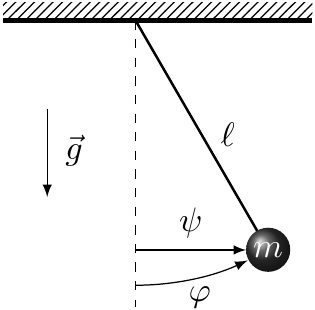

The best way to work out a simple pendulum is by using cylindrical coordinates. 
There is a single component with non null velocity in this representation for an ideal and rigid pendulum: the one on $\hat{\varphi}$, i.e., $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me # from sympy we use functions for mechanics
me.init_vprinting() # dot notation for velocity and acceleration

In [2]:
# Parameters for the system
m, g, l = sm.symbols('m, g, \ell', positive=True)

e = me.ReferenceFrame('e') # Cartesian frame of reference
phi = me.dynamicsymbols(r'\varphi')

In [3]:
particle_m = m
particle_r = l*(sm.sin(phi)* e.x - sm.cos(phi)* e.y )  # versor y is directed upward
particle_r

In [10]:
def energyKineticTranslation(mass, position, frameOfReference):
    """
    Given a mass and the position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of one particle
    position: (sympy.physics.vector.vector.Vector)
        of the particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which the position is expressed
    
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sm.Rational(1,2) # Rational: a quotient of integers
    T_translational = sm.Eq(
        sm.Symbol('T_\mathrm{translational}'),
        oneHalf* mass* velocity.dot(velocity)
        ).simplify()
    return T_translational

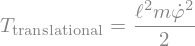

In [11]:
# System's kinetic energy
particle_T = energyKineticTranslation(particle_m, particle_r, e)
particle_T

If we set $V(y_0)= 0$, the gravitational potential is $V(y)= m g y$, but since we are using cylindrical coordinates, we better use the now known expression
$$
V_\mathrm{gravitational} = - \vec{P} \cdot \vec{r} = - (m \vec{g}) \cdot \vec{r}
$$

In [12]:
def energyPotentialGravitational(mass, position, accelerationGravity):
    """
    Provides the gravitational potential energy of a particle of mass m and position r in a given frame of reference in which g is the acceleration due to gravity.
    
    Parameters
    ----------
    accelerationGravity: (sympy.physics.vector.vector.Vector)
        vector oriented according to the frame of reference
    mass: (sympy.core.symbol.Symbol
        of the body
    position: (sympy.core.symbol.Symbol)
        of the center of mass in a frame of reference related to the one for the acceleration due to gravity

    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The potential energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        V = - (m \vec{accelerationGravity}) \cdot{position}
    """
    V_gravitational = sm.Eq(
        sm.Symbol('V_\mathrm{gravitational}'),
        - (mass* accelerationGravity).dot(position)
        ).simplify()
    return V_gravitational

In [13]:
# Potential energy
g_vector = g* (-e.y) # acceleration due to gravity on -y versor
particle_V = energyPotentialGravitational(particle_m, particle_r, g_vector)
particle_V

### Lagrangian for the ideal pendulum
Using the expressions for $T$ and $V$ calculated previously, we can write the Lagrangian for the ideal pendulum
$$
\mathcal{L}(\varphi, \dot{\varphi})= T(\dot{\varphi}) - V(\varphi)
$$

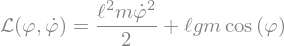

In [14]:
t = sm.Symbol('t') # we will differentiate with respect to time, so it is declared as symbol
L_ideal = sm.Eq(sm.Function('\mathcal{L}')(phi, sm.diff(phi,t) ) , particle_T.rhs - particle_V.rhs ) 
L_ideal

### Euler-Lagrange equation for the ideal pendulum

We will use this simple system to show that the Euler-Lagrange equations allow us to find the same dynamic equations that we find using Newton's second law.

We set up the Euler-Lagrange equation for the only generalized coordinate $\varphi$
$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{\varphi} }
- \frac{\partial \mathcal{L} }{\partial \varphi} &
 = 0 \\
\end{aligned}.
$$

We start by calculating `phi_dtdp`
$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{\varphi_i}} \mathcal{L}
$$

In [15]:
phi_dtdp = L_ideal.rhs.diff(phi.diff(t)).diff(t) # differentiates with respect to phi dot and then with respect to t
phi_dtdp.simplify()

And then `phi_dq`
$$
\frac{\partial}{\partial \varphi_i} \mathcal{L}
$$

In [16]:
phi_dq = L_ideal.rhs.diff(phi)
phi_dq.simplify()

With these results, we write the Euler-Lagrange equation

In [17]:
phi_EL = sm.Eq(
  phi_dtdp - phi_dq,
  0
  ).simplify()
phi_EL

From this, we can solve for $\varphi$

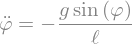

In [18]:
variable = phi.diff(t,2) # diff(t,2): second derivative with respect to time
sm.Eq(
  variable,
  sm.solveset(phi_EL, phi.diff(t,2) ).args[0]
  )

## Pendulum with free support
>- Section 5 ($\S 5$) Exercise 2  
Mechanics  
Lev Davidovich Landau and E. M. Lifshitz  
Institute of physical problems, USSR Academy of Sciences, 1976

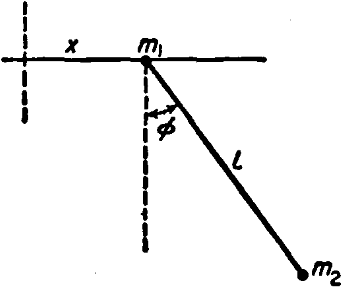

In [19]:
# Parameters for the system
m1, m2, g, l = sm.symbols('m_1, m_2, g, \ell', positive=True)

# Generalized coordinates
t = sm.symbols('t') # time
x, phi = me.dynamicsymbols('x, varphi')

# positions
particle1_r = x* e.x
particle2_r = particle1_r + l* (sm.cos(phi)* (-e.y) + sm.sin(phi)* (e.x)) # recall that y is directed upward

# masses
particle1_m = m1
particle2_m = m2

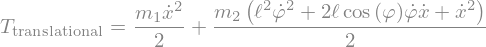

In [20]:
# System's kinetic energy
particle1_T = energyKineticTranslation(particle1_m, particle1_r, e)
particle2_T = energyKineticTranslation(particle2_m, particle2_r, e)
free_T = sm.Eq(
  particle1_T.lhs,
  particle1_T.rhs + particle2_T.rhs
  ).simplify()
free_T

In [21]:
# Potential energy
g_vector = g* (-e.y) # acceleration due to gravity on -y versor
particle1_V = energyPotentialGravitational(particle1_m, particle1_r, g_vector)
particle2_V = energyPotentialGravitational(particle2_m, particle2_r, g_vector)
free_V = sm.Eq(
  particle2_V.lhs,
  particle1_V.rhs + particle2_V.rhs 
  ).simplify()
free_V

### Lagrangian

Using $T$ and $V$, we finally express
$$
\mathcal{L} (\dot{x}, \varphi, \dot{\varphi})=
T(\dot{x}, \varphi, \dot{\varphi}) - V(\varphi).
$$

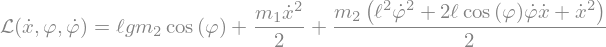

In [23]:
free_L = sm.Eq(
  sm.Function('\mathcal{L}')(x.diff(t), phi, phi.diff(t) ),
  free_T.rhs - free_V.rhs
  ).simplify()
free_L

### Euler-Lagrange equations

The system has two degrees of freedom, that we described with the generalized coordinates $x$ and $\varphi$. We must find the Euler-Lagrange equation for both.

The one for $x$ is
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x}} 
- \frac{\partial \mathcal{L} }{\partial x} 
= 0
$$


The LHS is simple because $x$ is not present in the Lagrangian, then
$$
\frac{\partial \mathcal{L} }{\partial x} = 0.
$$

The RHS is solved in two steps. First, we calculate the partial derivative with respect to the velocity
$$
\frac{\partial \mathcal{L} }{\partial \dot{x}} =
(m_1 + m_2) \dot{x} + m_2 \ell \cos{(\varphi)} \dot{\varphi}.
$$
and then we differentiate this with respect to time
$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x}} =
(m_1 + m_2) \ddot{x} + m_2 \ell ( - \sin{(\varphi)} \dot{\varphi}^2 +  \cos{(\varphi)} \ddot{\varphi} )\,.
$$

Merging both results we have

$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{x} }
- \frac{\partial \mathcal{L} }{\partial x} 
& = 0 \\
\left[ (m_1 + m_2) \ddot{x} + m_2 \ell ( - \sin{(\varphi)} \dot{\varphi}^2 +  \cos{(\varphi)} \ddot{\varphi} ) \right]
- 0 & = 0\\
m_1 \ddot{x} + m_2 ( - \ell \sin{(\varphi)} \dot{\varphi}^2 +  \ell \cos{(\varphi)} \ddot{\varphi} + \ddot{x} ) & = 0.
\end{aligned}
$$

In [24]:
x_free_EL = sm.Eq(
  free_L.rhs.diff(x.diff(t) ).diff(t) - free_L.rhs.diff(x),
  0
  ).simplify()
x_free_EL

The expression for $\varphi$ is a bit more complex:

$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial \mathcal{L} }{\partial \dot{\varphi}} 
& - \frac{\partial \mathcal{L} }{\partial \varphi}
= 0 \\
\frac{\mathrm{d}}{\mathrm{d} t} \left[ 
   m_2 \ell^2 \dot{\varphi}
 + m_2 \dot{x} \ell \cos{\varphi} 
 \right]
& 
- \left[m_2 g \ell (-\sin{\varphi}) + m_2 \dot{x} \ell (-\sin{\varphi}) \dot{\varphi} \right]
 =0 \\
 m_2 \left[ 
     \ell^2 \ddot{\varphi}
  + \dot{x} \ell (-\sin{\varphi}) \dot{\varphi}
  + \ddot{x} \ell \cos{\varphi}
 \right] 
 & -
 (-\sin{\varphi}) \left[ m_2 g \ell + m_2 \dot{x} \ell \dot{\varphi} \right]
 = 0
\end{aligned}.
$$

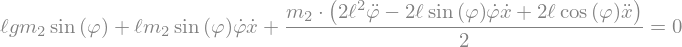

In [25]:
phi_free_EL = sm.Eq(
  free_L.rhs.diff(phi.diff(t) ).diff(t)
  - free_L.rhs.diff(phi) ,
  0
  )
phi_free_EL

This can be simplified:

In [26]:
phi_free_EL.simplify()

Solving these coupled Euler-Lagrange equations ($\ddot{x}$ is present in both) is something that we will do in future classes, through numerical simulations.

### Recalling the ideal pendulum

We can recall the ideal pendulum case from the pendulum with free support if we set $m_1$ at rest, by requiring $x \equiv 0$ and therefore $\dot{x} = 0$.

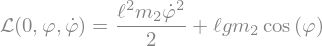

In [27]:
substitutions = {
    x : 0,
    x.diff(t) : 0,
} # this is a dictionary in Python
free_L.subs(substitutions)

which is the Lagrangian for the ideal pendulum.

We could do the same in the Euler-Lagrange equation for $\varphi$

In [28]:
phi_free_EL_subs = phi_free_EL.subs(substitutions).simplify()
phi_free_EL_subs

where we see the dynamic equation for the ideal pendulum inside parenthesis, from which we can solve

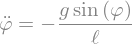

In [29]:
variable = phi.diff(t,2)
sm.Eq(
  variable,
  sm.solveset(phi_free_EL_subs, phi.diff(t,2) ).args[0]
  )

## Function for generating Euler-Lagrange equations

Similar to what we did for kinetic and potential energy, we can write a Python function for calculating an Euler-Lagrange equation.

In [31]:
def eulerLagrange(T, V, coordinateGeneralized):
    '''    
    Provides the Euler-Lagrange equation for one generalized coordinate starting from the energies.
    
    Parameters
    ----------
    T : Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        The potential energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        for which we are looking the Euler-Lagrange equation
        
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        Homogeneous Euler-Lagrange equation
    '''
    lagrangian = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # since we have to differentiate respect to time, the function diff declares t as a symbol
    return sm.Eq(
        lagrangian.diff(coordinateGeneralized) 
        - lagrangian.diff(coordinateGeneralized.diff(t)).diff(t)
        , 0
    ).simplify()

We must use this function for each generalized coordinate.

So in this case, we must use it twice.

In [32]:
x_EL = eulerLagrange(free_T, free_V, x)
phi_EL = eulerLagrange(free_T, free_V, phi)
x_EL

This is the same as the one we get manually for $x$.

In [33]:
phi_EL

And the same for $\varphi$.

It is remarkable that we don't need to find the Lagrangian, the function deals with that.